# 1 - Look at the big picture and frame the problem

### Frame the problem

1. Supervised learning - training examples are labeled
2. A classification task - predict a category (0/1)
3. Batch learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform doctors/physicians of patients at risks. Doctors/physicians will use the info to contact patients to discuss their future health concerns regarding their stroke risk and let them know of the available preventive medications.

In [61]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 - Load the dataset

In [62]:
# Load the database from our Github repo

url = "https://github.com/PranavKulkarni33/EECS3401-Group-Project/raw/main/healthcare.csv"
dataset = pd.read_csv(url)

In [63]:
# Create a backup copy of the dataset

dataset_backup = dataset

### 2.1 Take a quick look at the data structure using head, info and describe

In [64]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [66]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [67]:
dataset.shape

(5110, 12)

# 3 - Explore and visualize the data to gain insights

### 3.1 Plot a histogram of the data

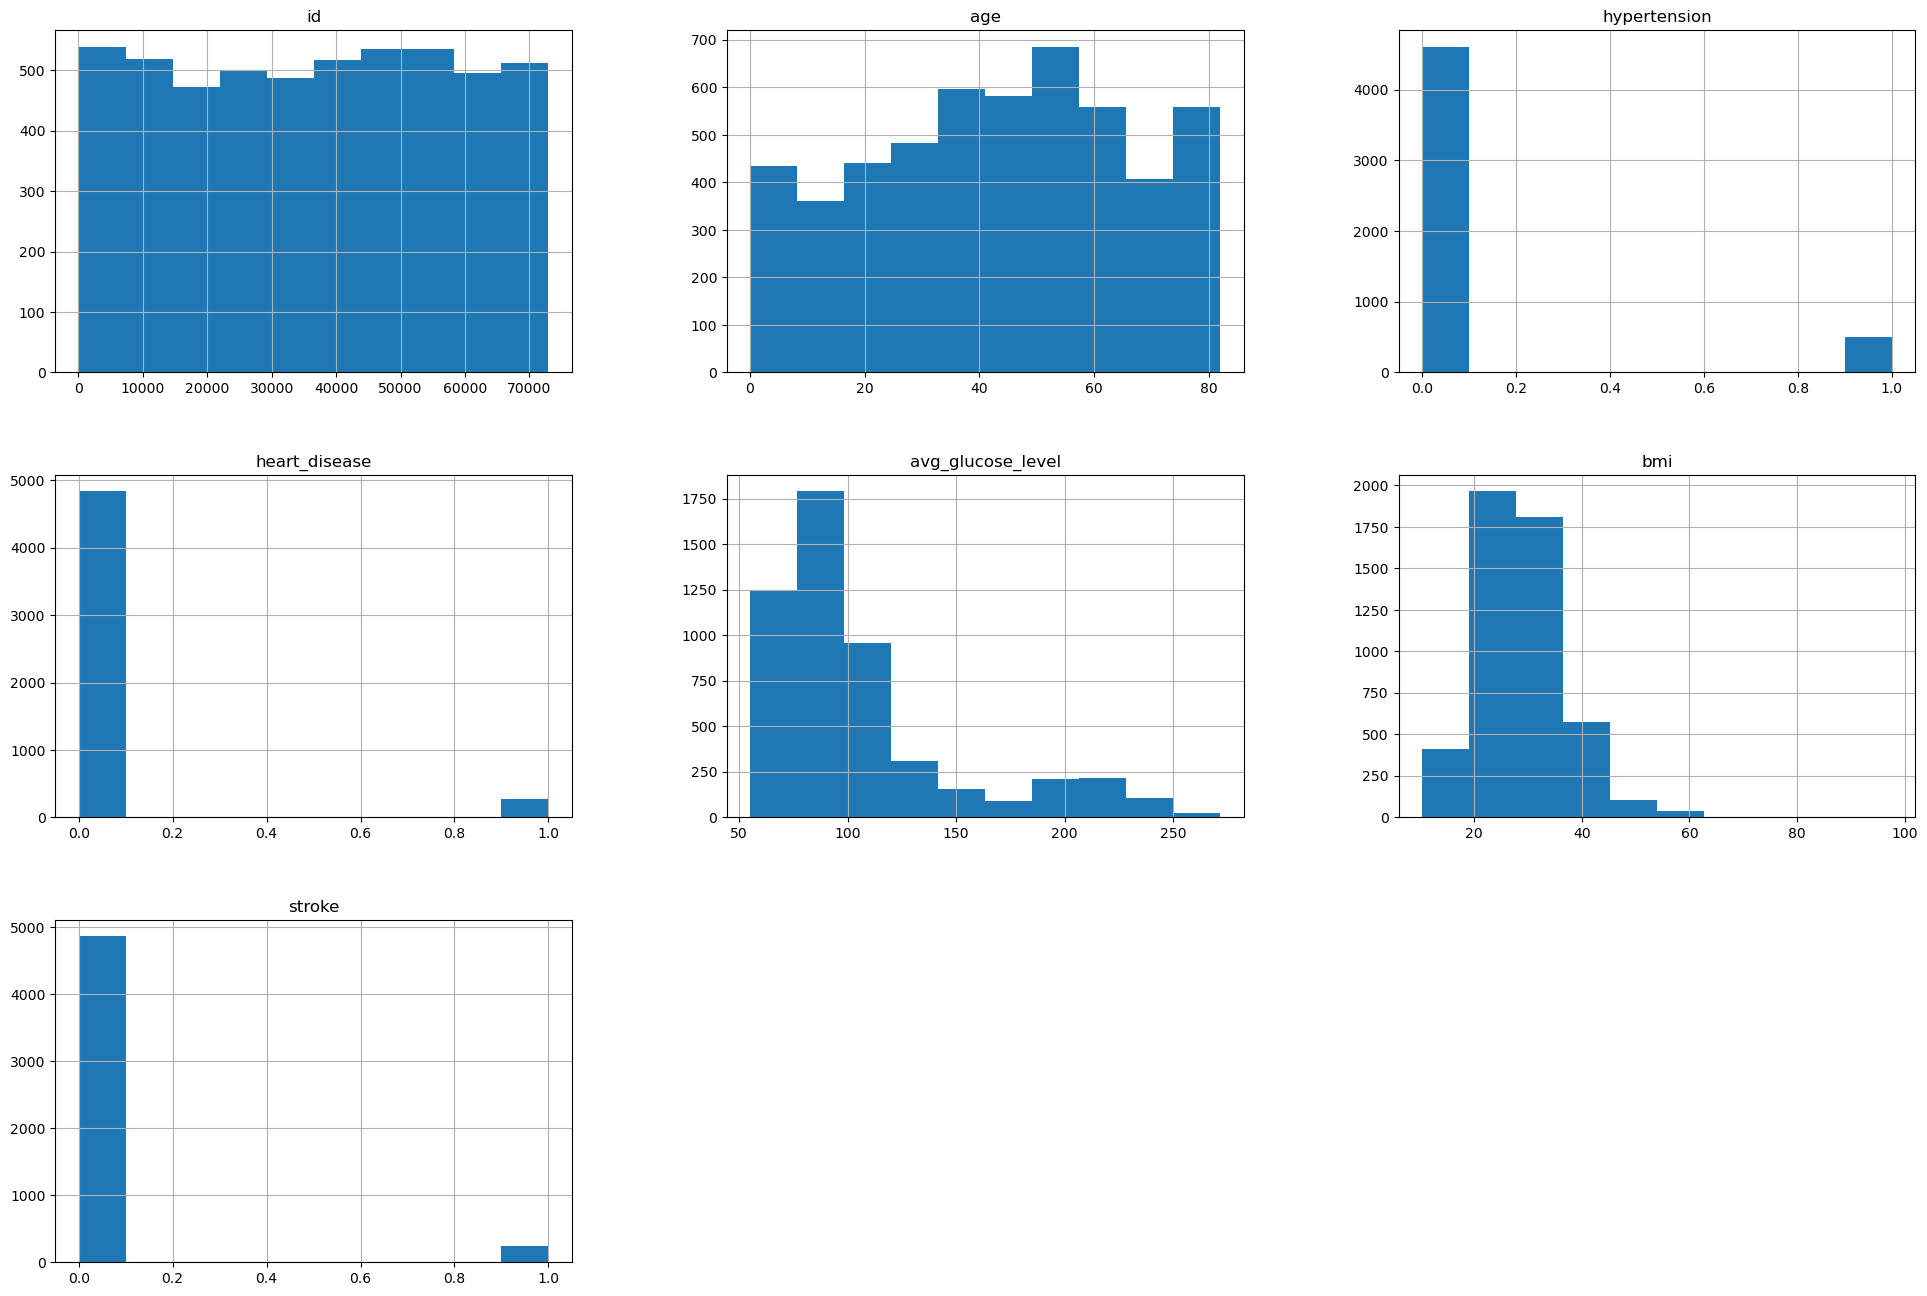

In [68]:
dataset.hist(figsize=(24, 16))
plt.show()

### 3.2 Look for correlations between the features

/Users/aacellular/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


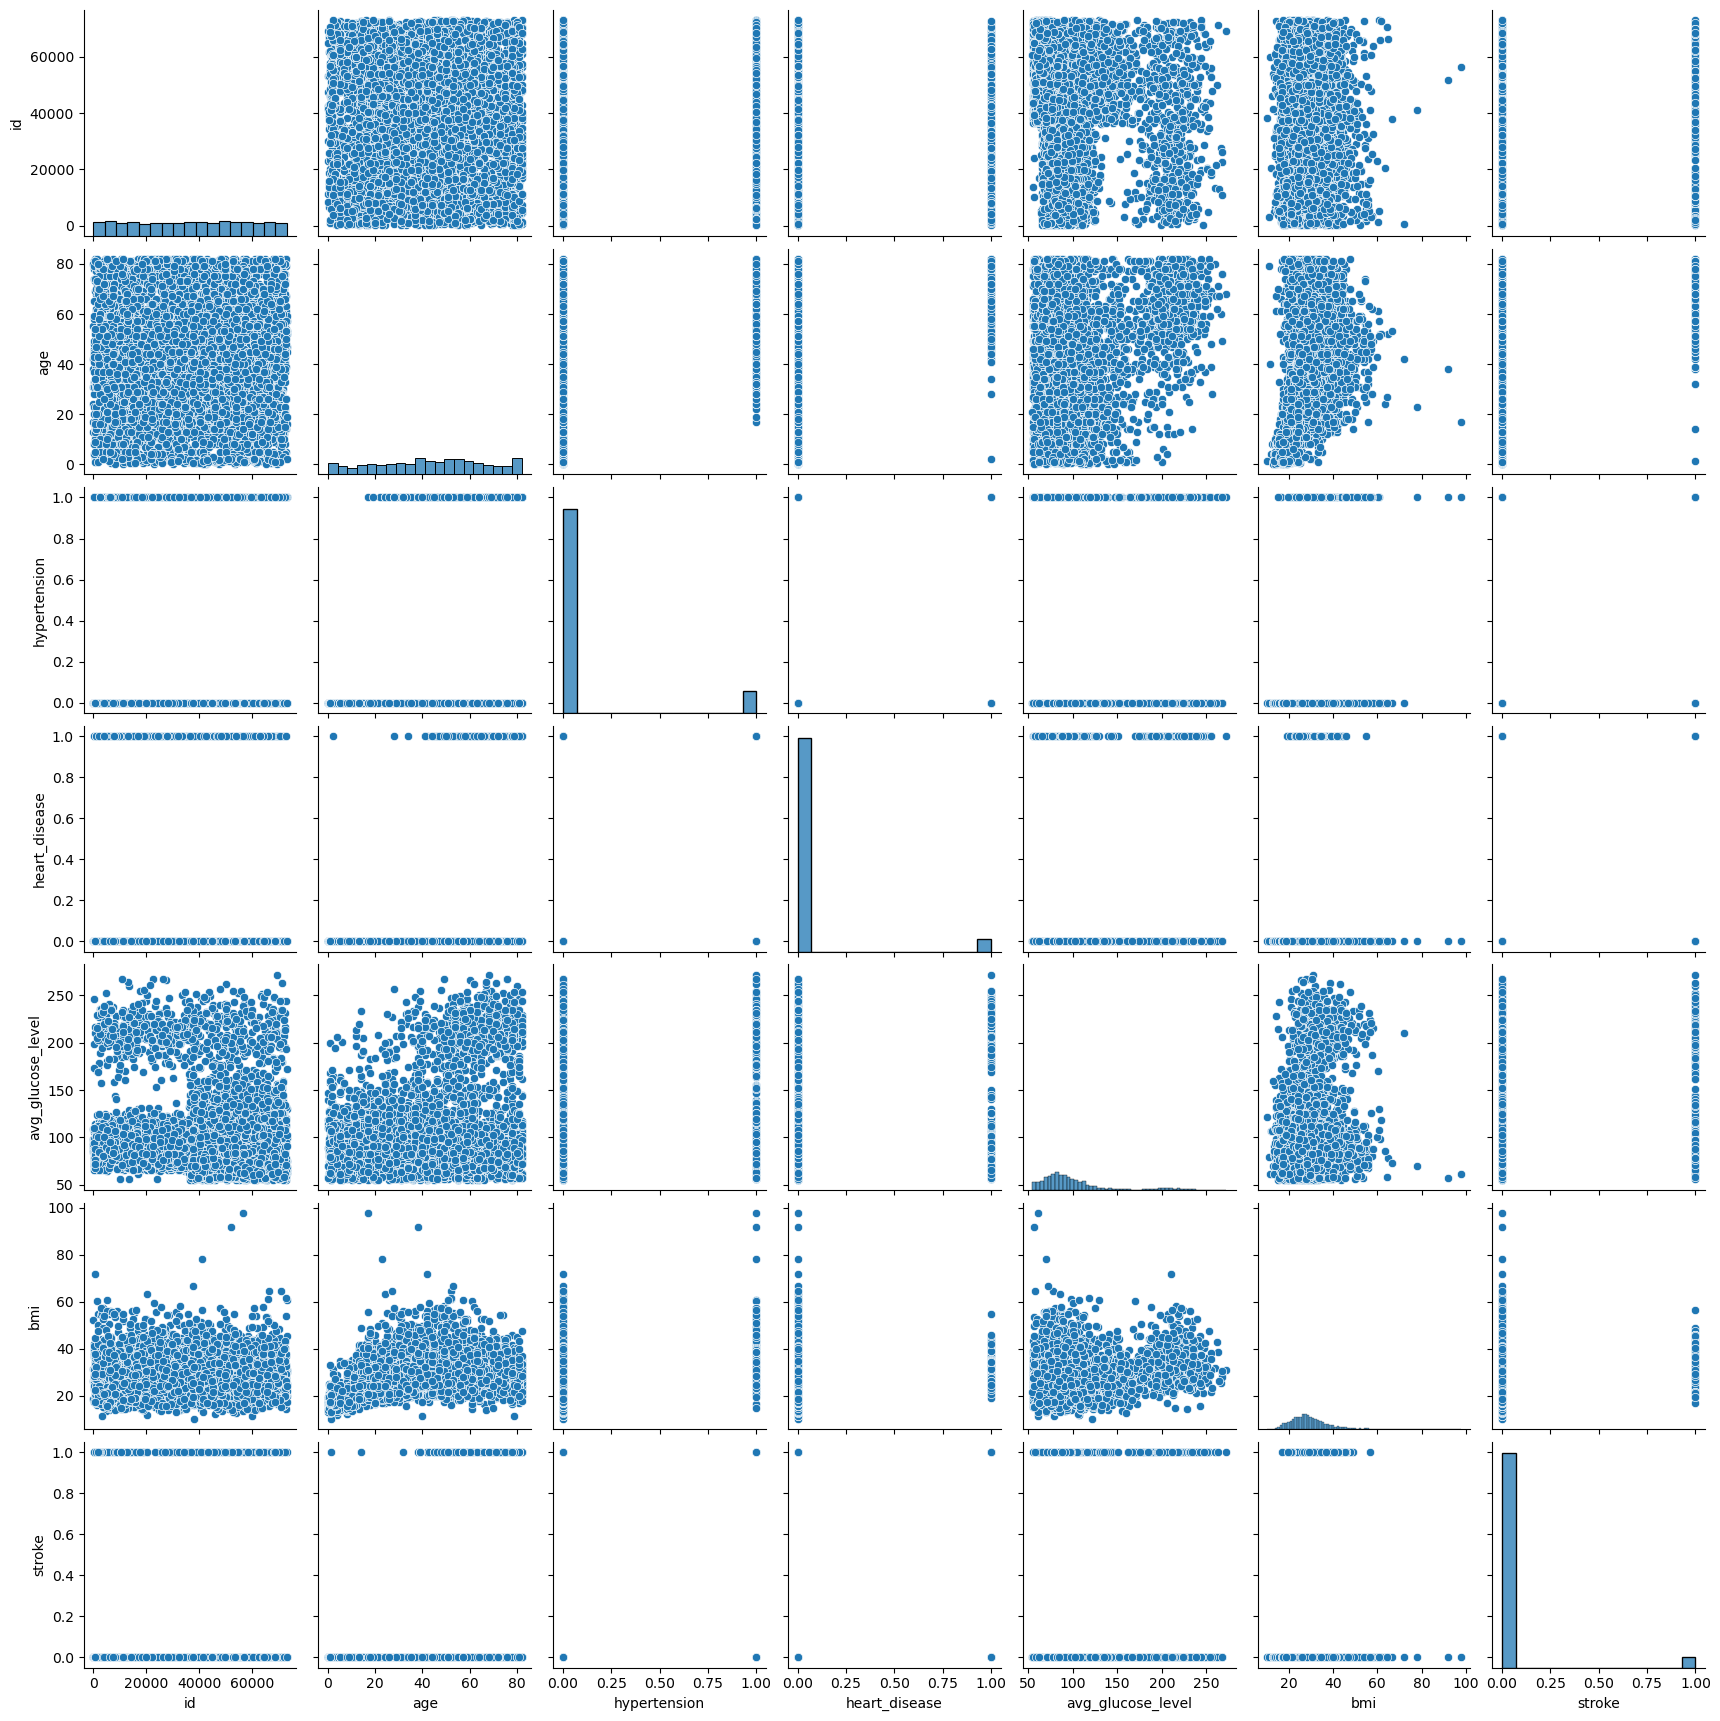

In [69]:
# Check for correlation between attributes using sns.pairplot.
sns.pairplot(dataset)

### Look for correlations using Pearson correlation coefficient. Plot some graphs

In [70]:
#corr method has pearson standard correlation coefficient as the default 

corr_matrix = dataset.corr(numeric_only=True)
corr_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


#### Look at correlations with regard to our target

In [71]:
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

### Plot Age vs. Stroke using a catplot and a boxplot.

/Users/aacellular/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


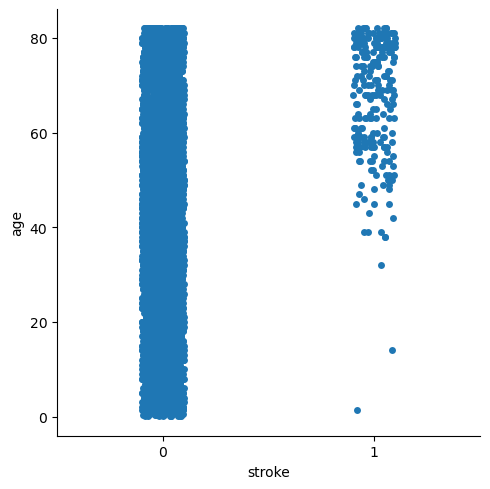

In [72]:
# Plot stroke vs. age
# if we can ONLY do 3 graphs, maybe take this one out??? bc box plot is good enough
sns.catplot(data=dataset, x="stroke", y="age")

<Axes: xlabel='stroke', ylabel='age'>

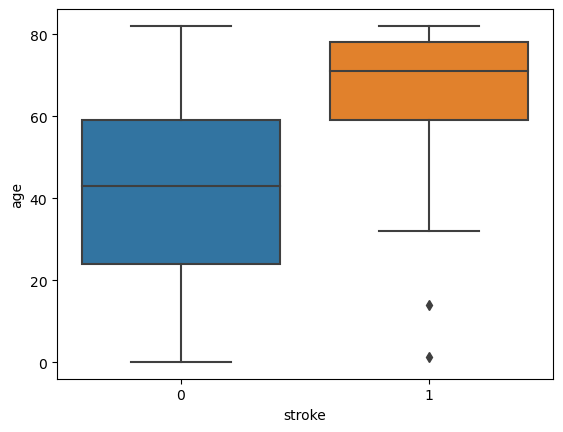

In [73]:
sns.boxplot(data = dataset, x = "stroke", y ="age")

In [74]:
# i didn't really like this graph, that's why i'm deleting
# sns.histplot( x="heart_disease", hue="stroke", data=dataset)

### Plot Age vs Avg_Glucose_Level vs Stroke on a Scatterplot

<Axes: xlabel='age', ylabel='avg_glucose_level'>

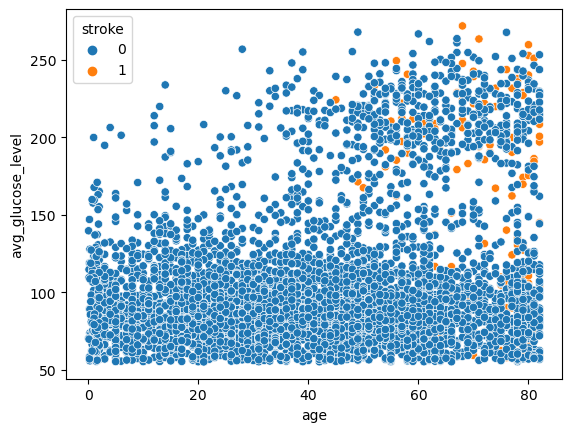

In [75]:
sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue="stroke")

# 4. Prepare the data for Machine Learning Algorithms

### 4.1 Check for duplicate rows and remove them if any

In [76]:
# Check for duplicate rows and delete them

dataset.duplicated().sum()

0

_There are zero duplicated rows and so nothing to delete_

### 4.2 Handle the missing values

### First check if there are any missing values represented with a '?'

In [77]:
# choose which line to use

dataset.isin(['?']).sum()
#(dataset.values == '?').sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

_There are zero missing values represented with a '?', so there is nothing to replace with null (nan)_

### Next, check how many "Unknown" values there are

In [78]:
dataset.isin(['Unknown']).sum(axis=0)

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

#### For the smoking_status feature, we will delete the whole feature

In [79]:
dataset.drop(labels=['smoking_status'], axis=1, inplace=True)

### Next, handle the missing (nan) values.

In [80]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

_There are only 201 missing values in one column ("BMI"). We will fill these missing values with the average/mean value later._

#### For the id feature, we will delete the whole feature

In [81]:
dataset.drop(labels=['id'], axis=1, inplace=True)

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


### 4.3. Create a pipeline that will:

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler. Do not scale the target

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

4. Encode the categorical columns using OneHotEncoder


In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [84]:
num_cols = dataset.select_dtypes(include='number').columns.to_list()
cat_cols = dataset.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("stroke")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [85]:
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [86]:
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type']

In [87]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [88]:
# Apply the preprocessing pipeline on the dataset

dataset_prepared = preprocessing.fit_transform(dataset)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
dataset_prepared = pd.DataFrame(data=dataset_prepared, columns=feature_names)

dataset_prepared.shape # column sizes have increased due to ONEHOTENCODER (originally look at line before Task 4) --> shows pipeline worked

(5110, 18)

In [89]:
dataset_prepared

,num__age,num__hypertension,num__heart_disease,num__avg_glucose_level,num__bmi,cat__gender_Female,cat__gender_Male,cat__gender_Other,cat__ever_married_No,cat__ever_married_Yes,cat__work_type_Govt_job,cat__work_type_Never_worked,cat__work_type_Private,cat__work_type_Self-employed,cat__work_type_children,cat__Residence_type_Rural,cat__Residence_type_Urban,remainder__stroke
0,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.786070,-0.328602,-0.238947,2.121559,4.615554e-16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,3.043196,-0.238947,-0.494658,4.615554e-16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5106,1.670617,-0.328602,-0.238947,0.420775,1.442949e+00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,-0.363842,-0.328602,-0.238947,-0.511443,2.217363e-01,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5108,0.343796,-0.328602,-0.238947,1.328257,-4.278451e-01,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Below confirms that there are no null values anymore, so our pipeline worked correctly

In [90]:
dataset_prepared.isna().sum()

num__age                        0
num__hypertension               0
num__heart_disease              0
num__avg_glucose_level          0
num__bmi                        0
cat__gender_Female              0
cat__gender_Male                0
cat__gender_Other               0
cat__ever_married_No            0
cat__ever_married_Yes           0
cat__work_type_Govt_job         0
cat__work_type_Never_worked     0
cat__work_type_Private          0
cat__work_type_Self-employed    0
cat__work_type_children         0
cat__Residence_type_Rural       0
cat__Residence_type_Urban       0
remainder__stroke               0
dtype: int64

### Next, find the value count of the target column, Stroke, to make sure it only has two categories (yes or no)

In [91]:
dataset["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

_This confirms it only has two categories, as required, so we don't have to do any modifications_

# 5 - Select a model and train it

### 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [92]:
from sklearn.model_selection import train_test_split

X = dataset_prepared.drop(["remainder__stroke"], axis=1)
y = dataset_prepared["remainder__stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4088, 17) (4088,) (1022, 17) (1022,)


### 5.2 Train model #1: SVM

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly')

grid search split data (can delete)

In [94]:
# X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)

# X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

# print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

Can deleete grid search cv because it should be behind the scenes
<!-- Pass all the following hyperparameters for the GridSearchCV to find the best ones -->

In [95]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# svm_parameters = {'kernel': ['rbf', 'linear', 'poly'],
#                   'C': [0.01, 0.1, 1, 10],
#                   'gamma': [0.01, 1, 10]
#                 }

# svm = SVC()
# svm_gs = GridSearchCV(estimator = svm,
#                       param_grid = svm_parameters)
# svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

# model_svm = svm_gs.best_estimator_
# model_svm.score(X_validation, y_validation)

In [96]:
# model_svm.get_params() # not doing model_svm because want to see which kernel it is too

In [97]:
# model_svm

In [98]:
# from sklearn.model_selection import train_test_split

# X = dataset_prepared.drop(["remainder__stroke"], axis=1)
# y = dataset_prepared["remainder__stroke"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

### 5.3 Train model #2: Logistic Regression

In [99]:
# got this code from https://www.datacamp.com/tutorial/understanding-logistic-regression-python

from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(random_state=16)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=16)

### 5.4 Train Model #3: Decision Tree

In [100]:
# got this code from https://www.datacamp.com/tutorial/decision-tree-classification-python

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree classifier object
model_dectree = DecisionTreeClassifier()
model_dectree.fit(X_train,y_train)


DecisionTreeClassifier()

# 6 - Test all 3 models on the test set, and report the classification reports

In [101]:
from sklearn.metrics import classification_report

In [102]:
svm_y_predict = model_svm.predict(X_test)
print(classification_report(y_test, svm_y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       960
         1.0       0.38      0.05      0.09        62

    accuracy                           0.94      1022
   macro avg       0.66      0.52      0.53      1022
weighted avg       0.91      0.94      0.91      1022



In [103]:
logreg_y_predict = model_logreg.predict(X_test)
print(classification_report(y_test, logreg_y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
dectree_y_predict = model_dectree.predict(X_test)
print(classification_report(y_test, dectree_y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       960
         1.0       0.27      0.18      0.21        62

    accuracy                           0.92      1022
   macro avg       0.61      0.57      0.59      1022
weighted avg       0.91      0.92      0.91      1022



# 7 - Evaluate all 3 models using cross validation with cv = 5. Report on the cross_val_score, and the mean of the accuracy scores.

In [105]:
from sklearn.model_selection import cross_val_predict, cross_val_score


In [106]:
svm_scores = cross_val_score(model_svm, X_train, y_train, cv=5)
svm_scores

array([0.95110024, 0.94743276, 0.95476773, 0.94492044, 0.94369645])

In [107]:
logreg_scores = cross_val_score(model_logreg, X_train, y_train, cv=5)
logreg_scores

array([0.95476773, 0.95354523, 0.95354523, 0.95471236, 0.95471236])

In [108]:
dectree_scores = cross_val_score(model_dectree, X_train, y_train, cv=5)
dectree_scores

array([0.89486553, 0.91320293, 0.90953545, 0.91064871, 0.90942472])

In [109]:
print(f'SVM Model Cross-Validation Mean Accuracy: {svm_scores.mean()}')
print(f'Logistic Regression Model Cross-Validation Mean Accuracy: {logreg_scores.mean()}')
print(f'Decision Tree Cross-Validation Mean Accuracy: {dectree_scores.mean()}')

SVM Model Cross-Validation Mean Accuracy: 0.9483835249122409
Logistic Regression Model Cross-Validation Mean Accuracy: 0.9542565830622498
Decision Tree Cross-Validation Mean Accuracy: 0.9075354702785848


# 8 - Plot the prediction vs. actual for the best performing model

### Best performing model is the Logistic Regression model, with the highest mean accuracy score

In [110]:
model_logreg

LogisticRegression(random_state=16)

### Print Classification Report

In [111]:
bestmodel_y_predict = model_logreg.predict(X_test)

print(classification_report(y_test, bestmodel_y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Print Confusion Matrix Display

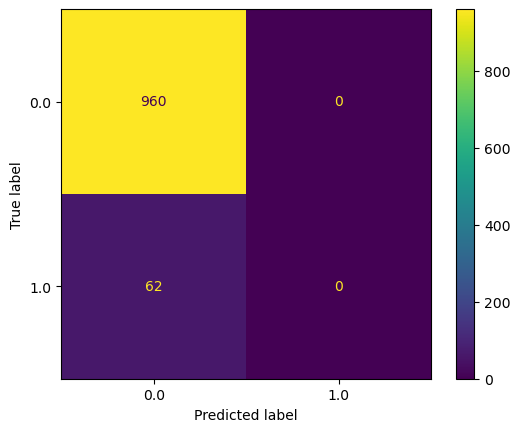

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, bestmodel_y_predict)

### Print Accuracy Score

In [113]:
# from sklearn.metrics import accuracy_score   

# score = accuracy_score(y_test, bestmodel_y_predict)
# print(score)

0.9393346379647749


# AUC-ROC

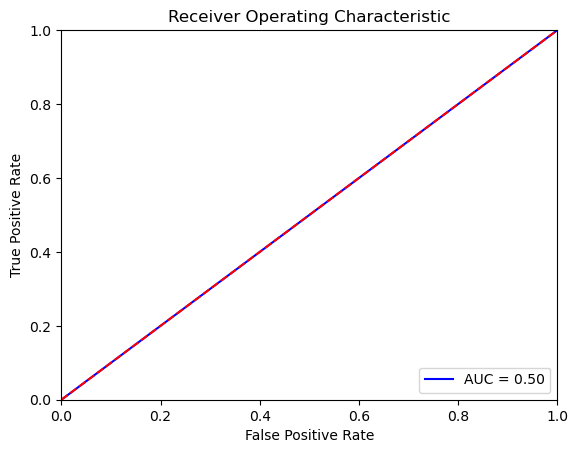

In [127]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, bestmodel_y_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision-Recall Curve

Text(0.5, 1.0, 'Train Precision-Recall curve')

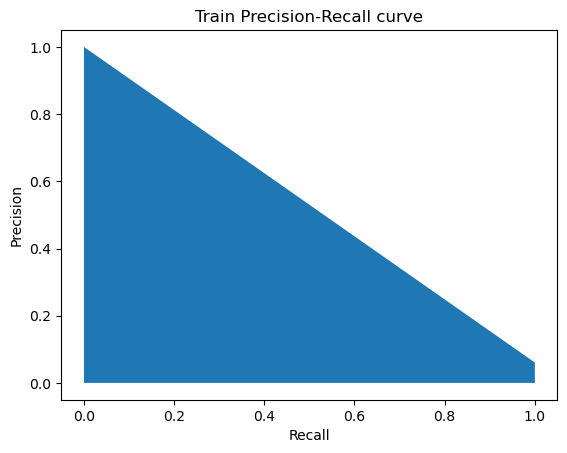

In [133]:
# don't think this is right!

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, bestmodel_y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")

Text(0.5, 1.0, 'Train Precision-Recall curve')

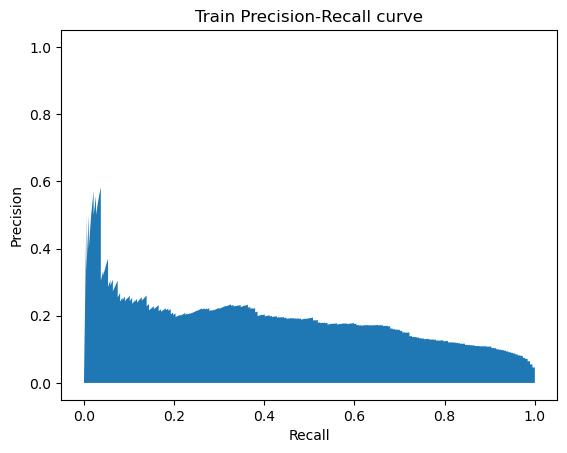

In [134]:
y_prob_train = model_logreg.predict_proba(X_train)[:,1]
y_prob_test = model_logreg.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")

# QUESTIONS:
- for task #3 in overview. Show 3 graphs of EDA. Is what we did good? YES, explain your findings (try to find correlations and normal curve distributions)
- should we delete ID column before pipeline? if yes, do i have to do the gridsearch again to get new hyperparameter values? YES
- task #5 in overview, "compare the performance of the models". I used classification reports and cross_val_score. is that okay to decide whats the best one?
- Task #5 in overview, what is "performance comparison table"? Is this in python or in our report? What specifically? REPORT like a table w accuracy, recall , etc and then final conclusion
- Task #6 in overview, what graphs do you want to see? like a classification report and confusion matrix? Or ROC curve? box plot? linear plot? How to do prediction vs actual for scatter plot? what are 3 different ways? Confusion Matrix is good, Area underneath curve is good SEARCH 3rd ONE
- what to put in the report... explanations of EDA graphs etc